In [72]:
#importing required packages
import numpy as np
import pandas as pd 
import seaborn as sns
pd.options.display.float_format='{:.2f}'.format
import math 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick 
from scipy.stats import norm, skew 
from scipy import stats

In [73]:
#reading the csv file and the first 5 rows of the dataset
telecom_cust = pd.read_csv(r"C:\Users\reddy\Downloads\DIC_dataset.csv") 
telecom_cust.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [74]:
#The info() tells about the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [75]:
#Dropping customer ID as it only has unique values hence cannot be used in classification
telecom_cust.drop(columns = ['customerID'], inplace = True)
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [76]:
#Conversion of the TotalCharges from string to float
l1 = [len(i.split()) for i in telecom_cust['TotalCharges']]
l2 = [i for i in range(len(l1)) if l1[i] != 1]
for i in l2:
    telecom_cust.loc[i,'TotalCharges'] = telecom_cust.loc[(i-1),'TotalCharges']    
telecom_cust['TotalCharges'] = telecom_cust['TotalCharges'].astype(float)
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [77]:
#label encoding on text data to convcert all the object features into numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = telecom_cust.copy(deep=True)
data_features = [i for i in list(telecom_cust.columns) if i not in list(telecom_cust.describe().columns)]
for i in data_features :
    df[i] = le.fit_transform(df[i])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


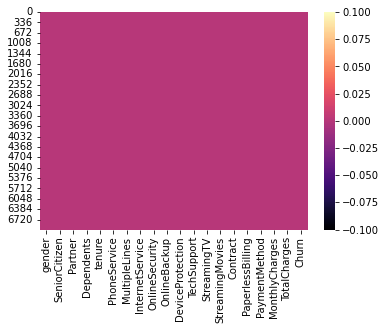

In [79]:
#heatmap to check the missing values
sns.heatmap(df.isnull(),cmap = 'magma');

In [80]:
df.describe() #as the name suggests it does the description and mathematical analysis of each column

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
count 7043.00        7043.00  7043.00     7043.00 7043.00       7043.00   
mean     0.50           0.16     0.48        0.30   32.37          0.90   
std      0.50           0.37     0.50        0.46   24.56          0.30   
min      0.00           0.00     0.00        0.00    0.00          0.00   
25%      0.00           0.00     0.00        0.00    9.00          1.00   
50%      1.00           0.00     0.00        0.00   29.00          1.00   
75%      1.00           0.00     1.00        1.00   55.00          1.00   
max      1.00           1.00     1.00        1.00   72.00          1.00   

       MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
count        7043.00          7043.00         7043.00       7043.00   
mean            0.94             0.87            0.79          0.91   
std             0.95             0.74            0.86          0.88   
min             0.00             0.00            0.00          0.00   
25%             0.00             0.00            0.00          0.00   
50%             1.00             1.00            1.00          1.00   
75%             2.00             1.00            2.00          2.00   
max             2.00             2.00            2.00          2.00   

       DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
count           7043.00      7043.00      7043.00          7043.00   7043.00   
mean               0.90         0.80         0.99             0.99      0.69   
std                0.88         0.86         0.89             0.89      0.83   
min                0.00         0.00         0.00             0.00      0.00   
25%                0.00         0.00         0.00             0.00      0.00   
50%                1.00         1.00         1.00             1.00      0.00   
75%                2.00         2.00         2.00             2.00      1.00   
max                2.00         2.00         2.00             2.00      2.00   

       PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges   Churn  
count           7043.00        7043.00         7043.00       7043.00 7043.00  
mean               0.59           1.57           64.76       2285.17    0.27  
std                0.49           1.07           30.09       2267.54    0.44  
min                0.00           0.00           18.25         18.80    0.00  
25%                0.00           1.00           35.50        401.68    0.00  
50%                1.00           2.00           70.35       1398.25    0.00  
75%                1.00           2.00           89.85       3803.05    1.00  
max                1.00           3.00          118.75       8684.80    1.00

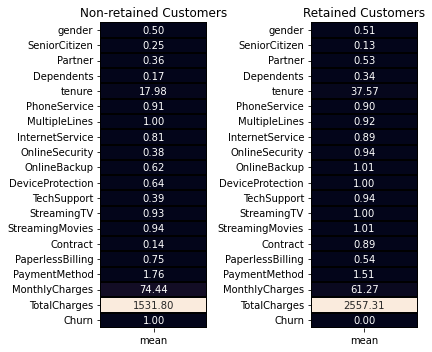

In [81]:
churn=df[df['Churn']==1].describe().T
not_churn=df[df['Churn']==0].describe().T
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(6,5))
#to plot the mean values of Retained customer features
plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot=True,linewidths=0.4,linecolor='black',cbar=False,fmt='.2f')
plt.title('Retained Customers');
#to plot the mean values of Non-retained customer features
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot=True,linewidths=0.4,linecolor='black',cbar=False,fmt='.2f')
plt.title('Non-retained Customers');
fig.tight_layout()

In [82]:
#Dividing features into Numerical and Categorical for better visualisation purposes
col=list(df.columns)
categorical_features=[]
numerical_features=[]
for i in col:
    if len(telecom_cust[i].unique())>6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)    

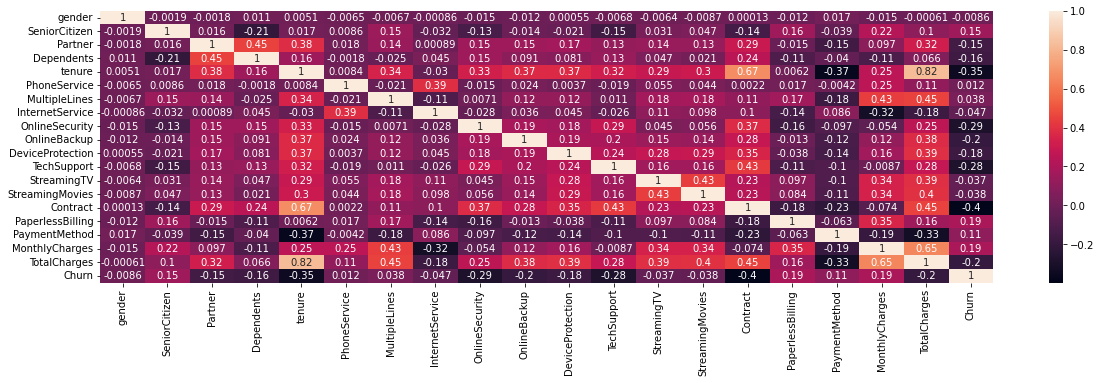

In [83]:
#plotting Correlation Matrix with all the features using heat map
plt.figure(figsize = (20,5))
sns.heatmap(df.corr(),annot = True);

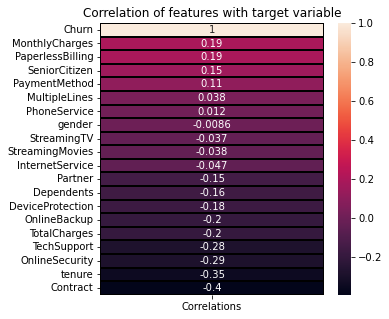

In [84]:
#performing correlation of features with target variable instead of all against all like earlier
corr=df.corrwith(df['Churn']).sort_values(ascending=False).to_frame()
corr.columns=['Correlations']
plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,linewidths=0.3,linecolor='black');#plotting the heat map
plt.title('Correlation of features with target variable');#the plotted map title

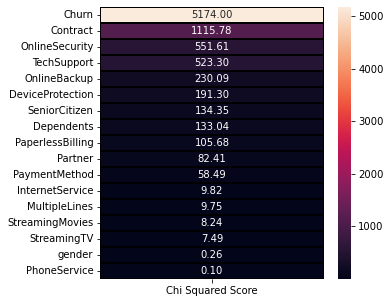

In [85]:
#for selecting the best features we are performing on the categorical features(Chi squared test)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif
features=df.loc[:,categorical_features]
# we set the target variable for comparison
target=df.loc[:,'Churn']
best_features=SelectKBest(score_func=chi2,k='all')#selection
fit=best_features.fit(features,target)
featureScores=pd.DataFrame(data=fit.scores_,index=list(features.columns),columns=['Chi Squared Score']) 
plt.subplots(figsize=(5,5))#plots the graph along with the score
sns.heatmap(featureScores.sort_values(ascending=False,by='Chi Squared Score'),annot=True,linewidths=0.4,linecolor='black',fmt='.2f');

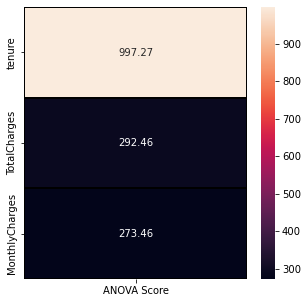

In [86]:
#for selecting the best features we are performing on the numerical features(Anova)
from sklearn.feature_selection import f_classif
features=df.loc[:,numerical_features]
target=df.loc[:,'Churn']#setting the target variable for comparision
best_features=SelectKBest(score_func=f_classif,k='all')#selection
fit=best_features.fit(features,target)
featureScores=pd.DataFrame(data=fit.scores_,index=list(features.columns),columns=['ANOVA Score']) 
plt.subplots(figsize=(5,5))#plots the graph along with the score
sns.heatmap(featureScores.sort_values(ascending=False,by='ANOVA Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');

In [87]:
#dropping the non important variables
df.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int32  
 2   Dependents        7043 non-null   int32  
 3   tenure            7043 non-null   int64  
 4   OnlineSecurity    7043 non-null   int32  
 5   OnlineBackup      7043 non-null   int32  
 6   DeviceProtection  7043 non-null   int32  
 7   TechSupport       7043 non-null   int32  
 8   Contract          7043 non-null   int32  
 9   PaperlessBilling  7043 non-null   int32  
 10  PaymentMethod     7043 non-null   int32  
 11  MonthlyCharges    7043 non-null   float64
 12  TotalCharges      7043 non-null   float64
 13  Churn             7043 non-null   int32  
dtypes: float64(2), int32(10), int64(2)
memory usage: 495.3 KB


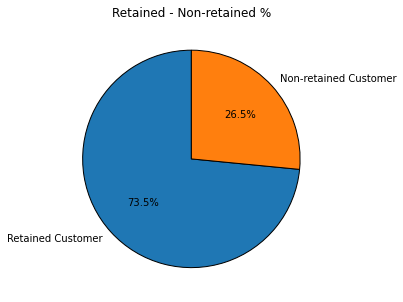

In [88]:
#Target variable - Churn Visualization by plotting a pie chart 
l=list(df['Churn'].value_counts())# list to hold all the tuple values of the churn column
circle=[l[0]/sum(l)*100,l[1]/sum(l)*100]
fig=plt.subplots(nrows=1,ncols=1,figsize=(20,5))# placement of the graph coordinates in the output
plt.subplot(1,2,1)
plt.pie(circle,labels=['Retained Customer','Non-retained Customer'],autopct='%1.1f%%',startangle=90,
       wedgeprops = {'linewidth': 1,'edgecolor' : 'black','antialiased' : True})# commands to obtain the desired comparison of the target variable 
plt.title('Retained - Non-retained %');#title of the chart

<AxesSubplot:>

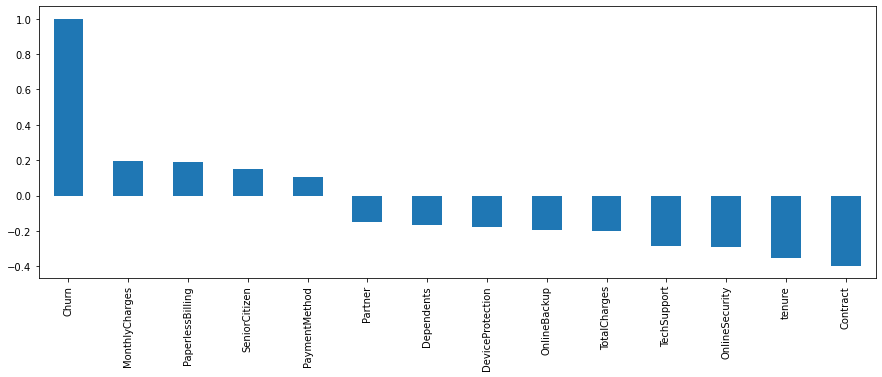

In [89]:
#Plotting bar graph to view the features after removing the unnecessary variables.
plt.figure(figsize=(15,5))
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

In [90]:
#removing churn for visualisation purposes
categorical_features.remove('Churn')

In [91]:
# breaking the features into groups
# Customer Information
l1=['SeniorCitizen','Partner','Dependents']
# Services Signed Up for!
l2=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] 
# Payment Information
l3=['Contract','PaperlessBilling','PaymentMethod'] 

C:\Users\reddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\reddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\reddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


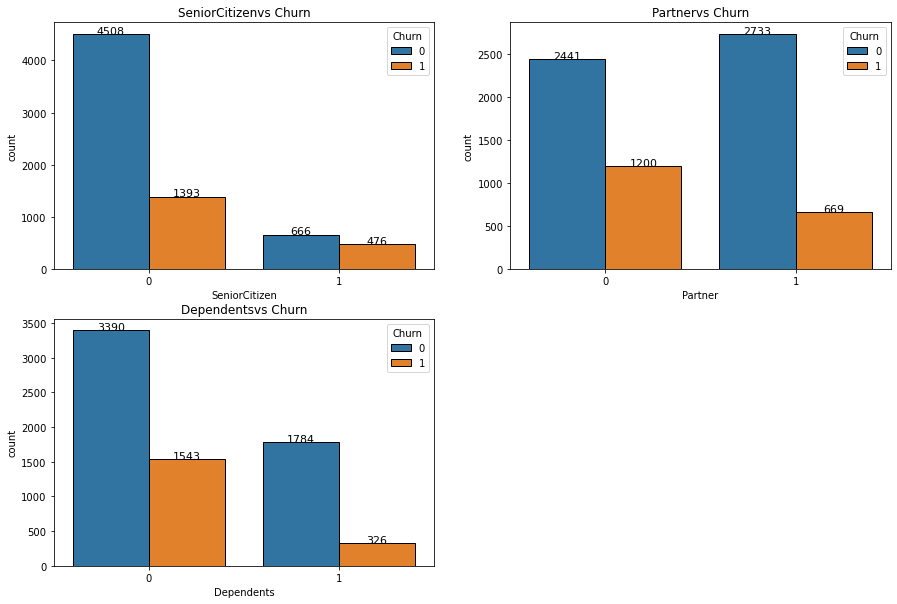

In [92]:
# plotting histograms of Customer Information vs target variable
fig=plt.subplots(nrows=1,ncols=1,figsize=(15,10))# placement of the graph coordinates in the output
for i in range(len(l1)):
    plt.subplot(2,2,i+1) #runs on loop for each each feature
    ax=sns.countplot(l1[i],data=df,hue="Churn",edgecolor='black')#specifies each histogram and their description from the dataset
    for rect in ax.patches:
        ax.text(rect.get_x()+rect.get_width()/2,rect.get_height()+2,rect.get_height(),horizontalalignment='center',fontsize=11)
    title=l1[i]+'vs Churn'
    plt.title(title);

C:\Users\reddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\reddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\reddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\reddy\anaconda3\lib\si

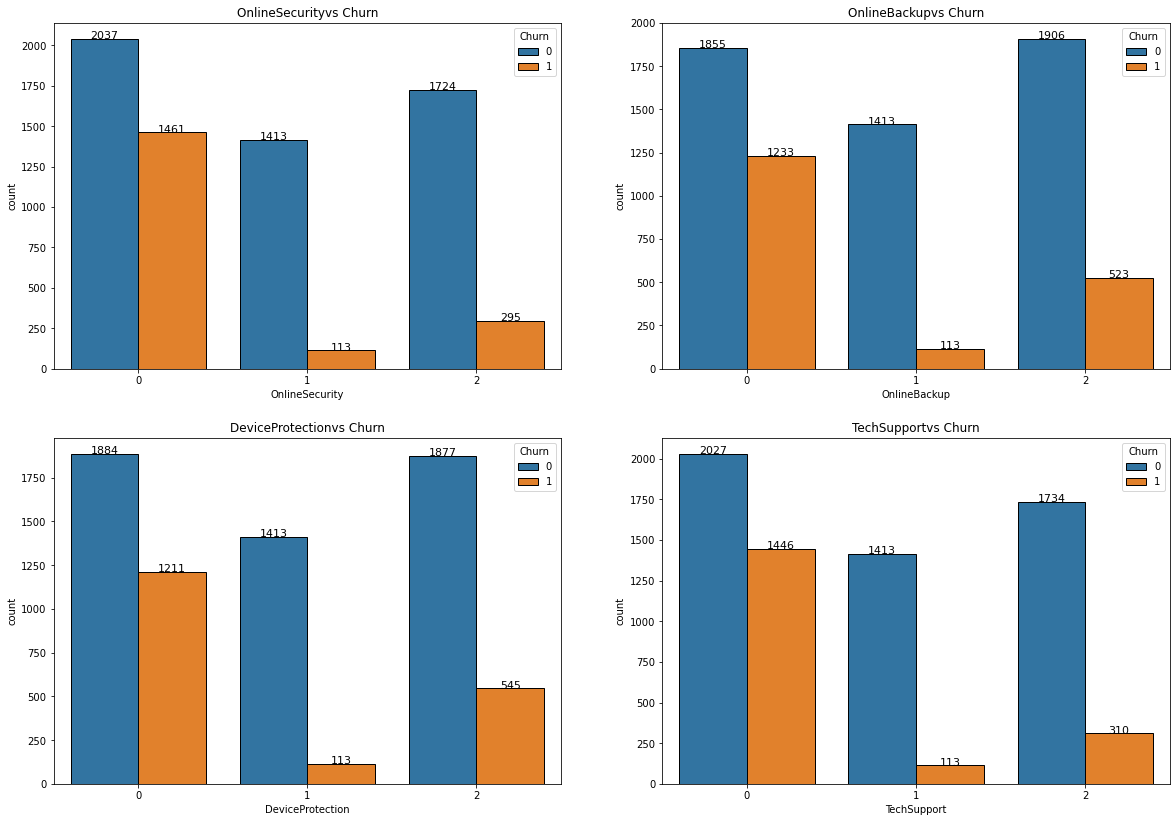

In [93]:
#Histogram of Services Subscribed by the Customer vs the Target variable
fig=plt.subplots(nrows=2,ncols=2,figsize=(20,14))#placement of the graph coordinates in the output
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i+1)#runs on loop for each each feature
    ax=sns.countplot(l2[-4+i],data=df,hue="Churn",edgecolor='black')#specifies each histogram and their description from the dataset
    for rect in ax.patches:
        ax.text(rect.get_x()+rect.get_width()/2,rect.get_height()+2,rect.get_height(),horizontalalignment='center',fontsize=11)
    title=l2[-4+i]+ 'vs Churn'#listing the name of each feature
    plt.title(title);

C:\Users\reddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\reddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\reddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


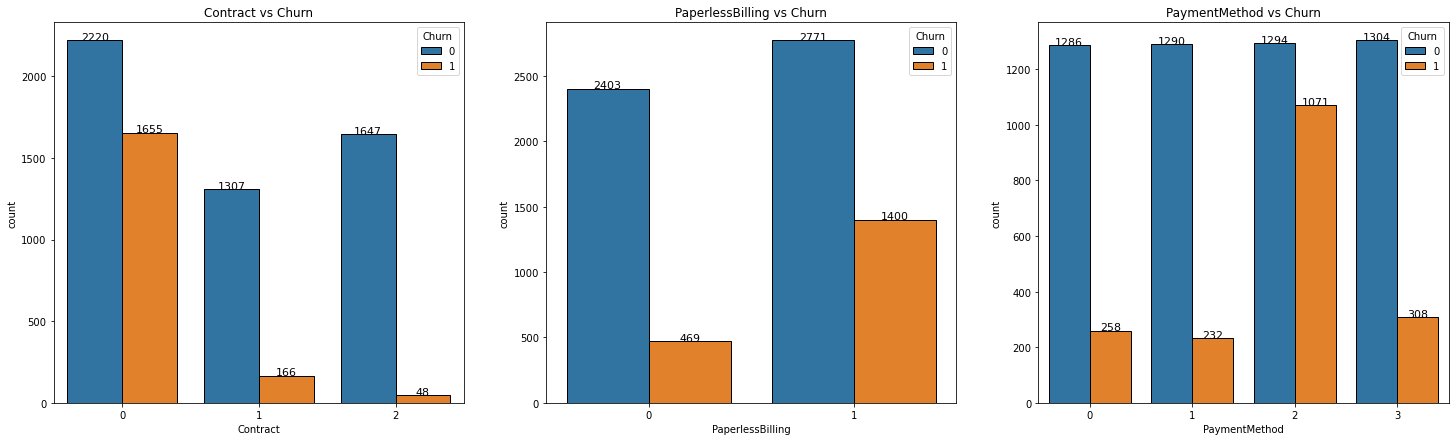

In [94]:
#Histogram of Payment Information of the Customer vs the Target variable
fig=plt.subplots(nrows=1,ncols=3,figsize=(25,7))#placement of the graph coordinates in the output
plt.subplot(1,3,1)#contract feature
ax=sns.countplot(l3[0],data=df,hue="Churn",edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2,rect.get_height()+2,rect.get_height(),horizontalalignment='center',fontsize=11)
title=l3[0]+' vs Churn'
plt.title(title);
plt.subplot(1,3,2)#paperless billing feature
ax=sns.countplot(l3[1],data=df,hue="Churn",edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2,rect.get_height()+2,rect.get_height(),horizontalalignment='center',fontsize=11)
title=l3[1]+' vs Churn'
plt.title(title);
plt.subplot(1,3,3)#payment method feature
ax=sns.countplot(l3[2],data=df,hue="Churn",edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2,rect.get_height()+2,rect.get_height(),horizontalalignment='center',fontsize=11)
title=l3[2]+' vs Churn'
plt.title(title);

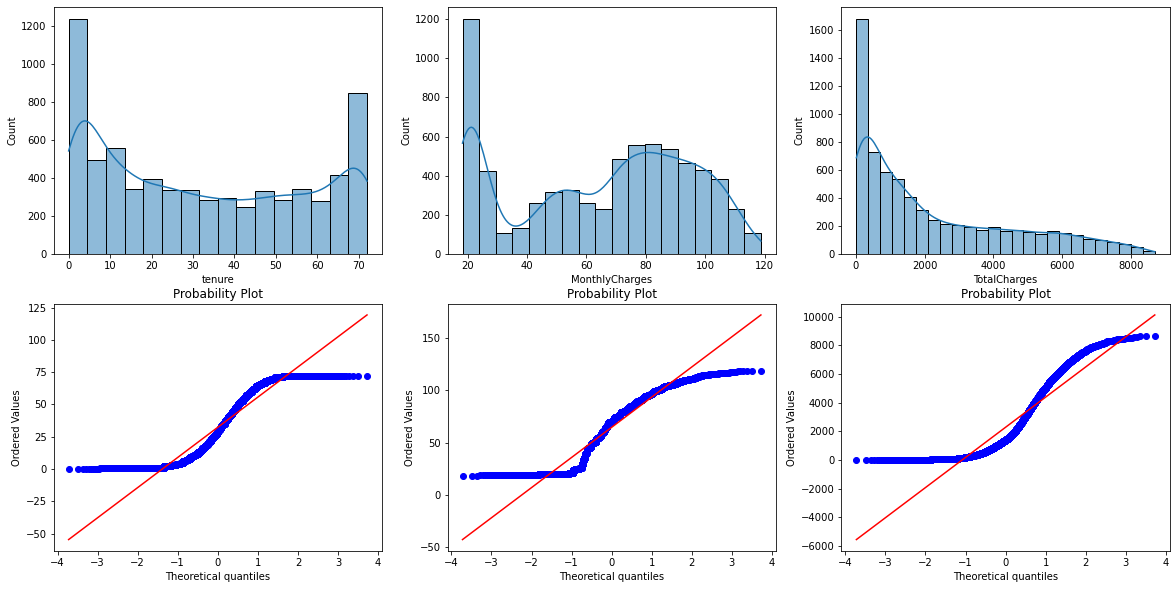

In [95]:
#Analyzing the Numerical Variables(Tenure, Monthly Charges, Total Charges) with respect to churn
plot,ax=plt.subplots(2,3,figsize=(20,10))
#plotting histogram and distributions of each numerical feature wrt churn
g=sns.histplot(df['tenure'],kde=True,ax=ax[0][0])
res=stats.probplot(df['tenure'],plot=ax[1][0])
g=sns.histplot(df['MonthlyCharges'],kde=True,ax=ax[0][1])
res=stats.probplot(df['MonthlyCharges'],plot=ax[1][1])
g=sns.histplot(df['TotalCharges'],kde=True,ax=ax[0][2])
res=stats.probplot(df['TotalCharges'],plot=ax[1][2])

<AxesSubplot:>

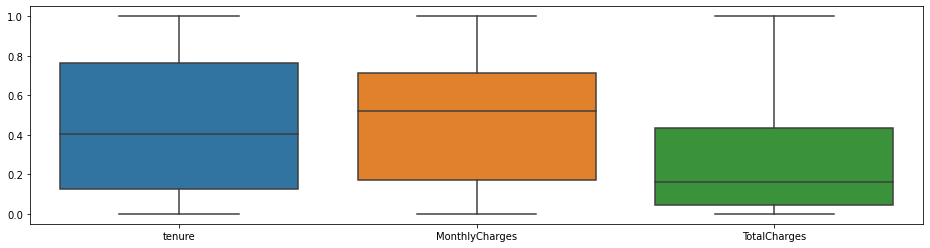

In [96]:
#Performing normalisation of each numerical feature
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
df['tenure']=mms.fit_transform(df[['tenure']])
df['MonthlyCharges']=mms.fit_transform(df[['MonthlyCharges']])
df['TotalCharges']=mms.fit_transform(df[['TotalCharges']])
# outlier detection using box plots
plt.figure(figsize=(16,4))
sns.boxplot(data=df[['tenure','MonthlyCharges','TotalCharges']])

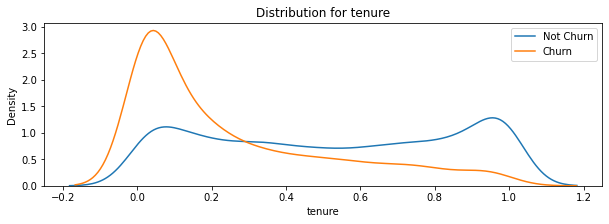

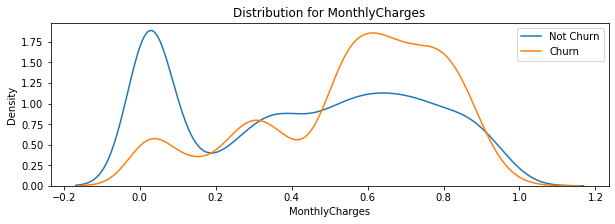

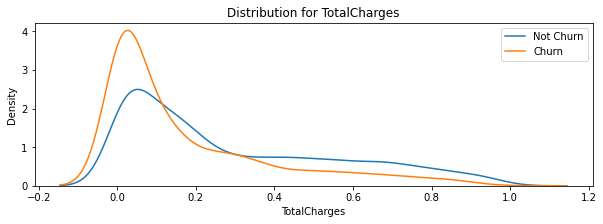

In [97]:
#Visualizing against Churn
def plot(feature):#defining a method to plot the distribution graph of the numerical features against churn
    plt.figure(figsize=(10, 3))
    plt.title("Distribution for {}".format(feature))
    ax0=sns.kdeplot(df[df['Churn']==0][feature].dropna(),label='Churn: No')
    ax1=sns.kdeplot(df[df['Churn']==1][feature].dropna(),label='Churn: Yes')
    ax0.legend(["Not Churn","Churn"],loc='upper right')
plot('tenure')
plot('MonthlyCharges')
plot('TotalCharges')

C:\Users\reddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\reddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\reddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


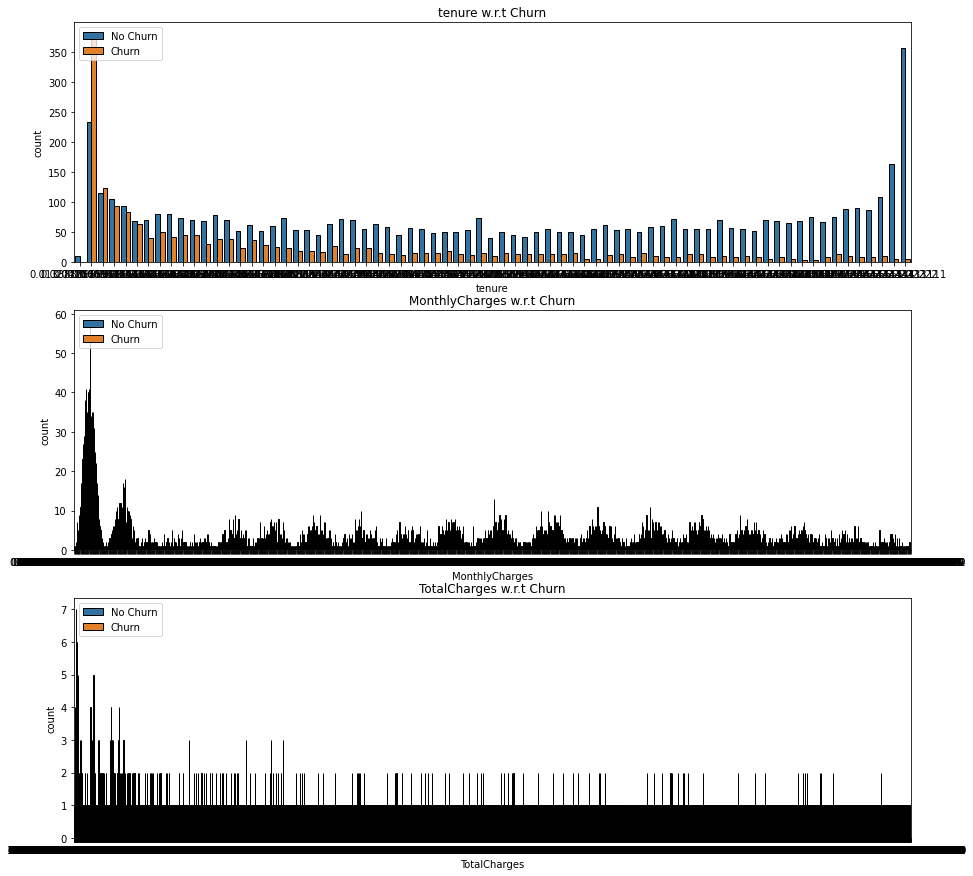

In [98]:
#Visualization of Numerical Features w.r.t Target Variable (Churn)
fig,ax=plt.subplots(nrows=3,ncols=1,figsize=(15,15))#the coordinates at which the plots need to be placed in the output
for i in range(len(numerical_features)):# loop to run each of teh three numerical features
    plt.subplot(3,1,i+1)
    sns.countplot(numerical_features[i],data=df,hue="Churn",edgecolor='black')
    plt.legend(['No Churn','Churn'],loc = 'upper left')
    title=numerical_features[i]+' w.r.t Churn'
    plt.title(title);